# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import savefig

np.random.seed(42)

# Loading Datasets

### Training Set

In [2]:
df_train = pd.read_csv('resources/train.csv')
df_train.head()

,Country,Year,Ladder,GDP,Support,Health,Freedom,Generosity,Corruption
0,Afghanistan,2008,3.723590,7.144916,0.450662,50.799999,0.718114,0.178993,0.881686
1,Afghanistan,2009,4.401778,7.314788,0.552308,51.200001,0.678896,0.201228,0.850035
2,Afghanistan,2010,4.758381,7.421525,0.539075,51.599998,0.600127,0.131578,0.706766
3,Afghanistan,2011,3.831719,7.394349,0.521104,51.919998,0.495901,0.173452,0.731109
4,Afghanistan,2012,3.782938,7.480296,0.520637,52.240002,0.530935,0.246943,0.775620


### Test Set

In [3]:
df_test = pd.read_csv('resources/test.csv')
df_test.head()

,Country,Region,Ladder,GDP,Support,Health,Freedom,Generosity,Corruption
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900826,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218


# Feature Selection based on Correlation

### Correlation Matrix

In [4]:
corr = df_train.corr()
corr

,Year,Ladder,GDP,Support,Health,Freedom,Generosity,Corruption
Year,1.000000,0.029163,0.062659,-0.019373,0.150330,0.218226,-0.036480,-0.087785
Ladder,0.029163,1.000000,0.779501,0.710214,0.750692,0.521902,0.190646,-0.441650
GDP,0.062659,0.779501,1.000000,0.692312,0.843902,0.346521,-0.021038,-0.339023
Support,-0.019373,0.710214,0.692312,1.000000,0.613505,0.412240,0.056283,-0.219433
Health,0.150330,0.750692,0.843902,0.613505,1.000000,0.375106,0.027854,-0.326490
Freedom,0.218226,0.521902,0.346521,0.412240,0.375106,1.000000,0.332619,-0.485419
Generosity,-0.036480,0.190646,-0.021038,0.056283,0.027854,0.332619,1.000000,-0.295570
Corruption,-0.087785,-0.441650,-0.339023,-0.219433,-0.326490,-0.485419,-0.295570,1.000000


### Correlation Heatmap

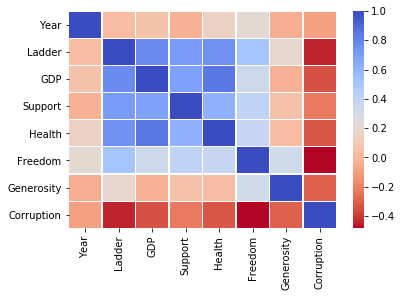

In [5]:
sns_plot = sns.heatmap(corr, cmap='coolwarm_r', linecolor='white', linewidths=0.2)
figure = sns_plot.get_figure()
figure.savefig("resources/heatmap.png", dpi=400, bbox_inches='tight', pad_inches=0.6)

* Strongest correlations with the target variable **Ladder** are **GDP**, **Support**, and **Health** (with **0.779501**, **0.710214**, and **0.750692**)  




* A bit weaker correlated w/**Ladder** are **Freedom**, **Generosity**, and **Corruption** (with **0.521902**, **0.190646** and **-0.441650**)  




* The highest correlation between features is between **GDP** and **Health** with **0.843902**  




* No features have a correlation greater than 0.9, so no features will be dropped based on the correlation matrix  

# Feature Selection based on p-value

In [10]:
# Automated Backward Elimination with p-values only:
def backwardElimination(x, y, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    print(regressor_OLS.pvalues)
    print('--------------------------------------------------------')
    print(regressor_OLS.summary())
    print('--------------------------------------------------------')
    return x

# Setting up training arrays of predictors and target
X_train = df_train.iloc[:, 3:].values
y_train = df_train.iloc[:, 2].values
X_test = df_test.iloc[:, 3:].values
y_test = df_test.iloc[:, 2].values

# Need to add a column of ones at the beginning of X-array for the constant in the linear model
X_train = np.append(arr = np.ones((len(y_train), 1)).astype(int), values = X_train, axis = 1)
X_test = np.append(arr = np.ones((len(y_test), 1)).astype(int), values = X_test, axis = 1)

# Setting significance level and function call
SL = 0.05
X_Modeled = backwardElimination(X_train, y_train, SL)

[9.15466449e-25 2.77105665e-34 4.15675117e-44 2.54918906e-21
 6.72509413e-16 1.75927559e-13 4.39126879e-12]
--------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     792.5
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:48:30   Log-Likelihood:                -1409.9
No. Observations:                1627   AIC:                             2834.
Df Residuals:                    1620   BIC:                             2872.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t  

* No p-values are greater than the significance level of 0.5  


* All features will be kept

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
choose = [1,2,3,4,5,6]
n = len(y_test)
k = len(choose)
regressor.fit(X_train[:, choose], y_train)
y_pred = regressor.predict(X_test[:, choose])
R2 = r2_score(y_test, y_pred)
print("Train: ", regressor.score(X_train[:, choose], y_train))
print("Test: ", regressor.score(X_test[:, choose], y_test))
print("From Metrics: ", R2)
print("Adjusted Test: ", R2 - ((k - 1) / (n - k)) * (1 - R2))


Train:  0.7458799441986448
Test:  0.7358830694931894
From Metrics:  0.7358830694931893
Adjusted Test:  0.7268995004283317


In [14]:
# Remove 5 Generosity
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
choose = [1,2,3,4,6]
n = len(y_test)
k = len(choose)
regressor.fit(X_train[:, choose], y_train)
y_pred = regressor.predict(X_test[:, choose])
R2 = r2_score(y_test, y_pred)
print("Train: ", regressor.score(X_train[:, choose], y_train))
print("Test: ", regressor.score(X_test[:, choose], y_test))
print("From Metrics: ", R2)
print("Adjusted Test: ", R2 - ((k - 1) / (n - k)) * (1 - R2))

Train:  0.7372221559800367
Test:  0.7306719485073316
From Metrics:  0.7306719485073316
Adjusted Test:  0.7233928119805028


In [15]:
# Remove 6 Corruption
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
choose = [1,2,3,4]
n = len(y_test)
k = len(choose)
regressor.fit(X_train[:, choose], y_train)
y_pred = regressor.predict(X_test[:, choose])
R2 = r2_score(y_test, y_pred)
print("Train: ", regressor.score(X_train[:, choose], y_train))
print("Test: ", regressor.score(X_test[:, choose], y_test))
print("From Metrics: ", R2)
print("Adjusted Test: ", R2 - ((k - 1) / (n - k)) * (1 - R2))

Train:  0.7254106535821597
Test:  0.7191898820435914
From Metrics:  0.7191898820435914
Adjusted Test:  0.7135359870511805


In [16]:
# Remove 4 Freedom
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
choose = [1,2,3]
n = len(y_test)
k = len(choose)
regressor.fit(X_train[:, choose], y_train)
y_pred = regressor.predict(X_test[:, choose])
R2 = r2_score(y_test, y_pred)
print("Train: ", regressor.score(X_train[:, choose], y_train))
print("Test: ", regressor.score(X_test[:, choose], y_test))
print("From Metrics: ", R2)
print("Adjusted Test: ", R2 - ((k - 1) / (n - k)) * (1 - R2))

Train:  0.687724371260661
Test:  0.686471000947932
From Metrics:  0.686471000947932
Adjusted Test:  0.6822906142939045


In [17]:
# Remove 2 Support
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
choose = [1,3]
n = len(y_test)
k = len(choose)
regressor.fit(X_train[:, choose], y_train)
y_pred = regressor.predict(X_test[:, choose])
R2 = r2_score(y_test, y_pred)
print("Train: ", regressor.score(X_train[:, choose], y_train))
print("Test: ", regressor.score(X_test[:, choose], y_test))
print("From Metrics: ", R2)
print("Adjusted Test: ", R2 - ((k - 1) / (n - k)) * (1 - R2))

Train:  0.6375863636211276
Test:  0.6397060378325111
From Metrics:  0.6397060378325111
Adjusted Test:  0.6373199851029251


In [24]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
choose = [1,2,3,4,5]
n = len(y_test)
k = len(choose)
regressor.fit(X_train[:, choose], y_train)
y_pred = regressor.predict(X_test[:, choose])
R2 = r2_score(y_test, y_pred)
print("Train: ", regressor.score(X_train[:, choose], y_train))
print("Test: ", regressor.score(X_test[:, choose], y_test))
print("From Metrics: ", R2)
print("Adjusted Test: ", R2 - ((k - 1) / (n - k)) * (1 - R2))
# (All) Adjusted Test:  0.7268995004283317 (0.727)
# (No GDP) Adjusted Test:  0.7138807532187827 (0.714)
# (No Support) Adjusted Test:  0.6912753646493122 (0.691)
# (No Health) Adjusted Test:  0.7142154927279709 (0.714)
# (No Freedom) Adjusted Test:  0.7145171423962183 (0.715)
# (No Generosity) Adjusted Test:  0.7233928119805028 (0.723)
# (No Corruption) Adjusted Test:  0.7218324788341649 (0.722)

Train:  0.7382448697185999
Test:  0.7291526767595816
From Metrics:  0.7291526767595816
Adjusted Test:  0.7218324788341649


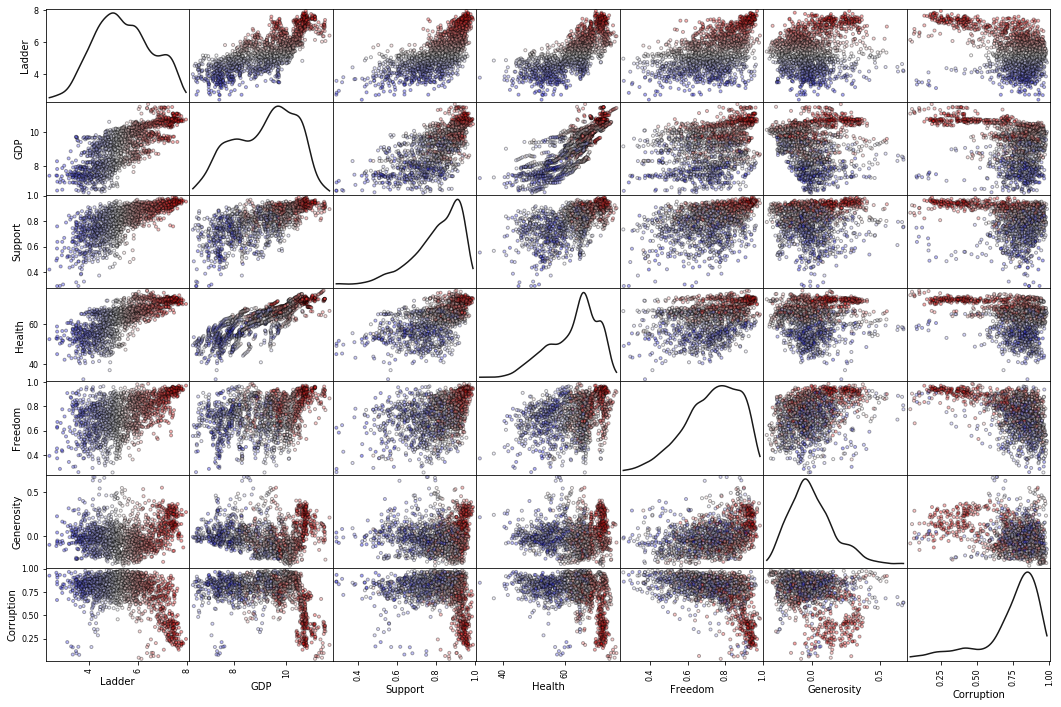

In [25]:
from pandas.plotting import scatter_matrix as scm

df_features = df_train.iloc[:, 2:]
y = df_train.iloc[:, 2].values

scm(df_features, figsize=(18,12), diagonal='kde', density_kwds={"color": 'k', "alpha": 0.9},
    **{"c": y, "cmap": "bwr", "alpha": 0.35, "ec": 'k', "lw": 1})

plt.savefig("resources/scatter_matrix.png", dpi=450, bbox_inches='tight', pad_inches=0.15)